# 0. 설정

In [68]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers

import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_loss(history):
    plt.plot(pd.DataFrame(history.history))
    plt.grid(True)
    plt.gca().set_ylim(0, 1.5)
    plt.legend((history.params['metrics']))
    plt.show()

def plot_prediction(y_sample, y_pred_list):

    plt.figure(figsize=(15,3))
    plt.plot(y_sample, marker='o')
    plt.plot(y_pred_list[0], label = "line1", marker='o')
    plt.plot(y_pred_list[1], label = "line2", marker='o')
    plt.legend(('y true', 'y_pred_list'))

# 4. 캘리포니아 데이터셋 - 회귀 MLP

## 4-1. 데이터 불러오기

In [2]:
housing = fetch_california_housing()

x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
print('* Org data info : ', x_train.shape)
print( x_train[0])

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print('\n* Transfored data info : ', x_train.shape)
print( x_train[0])

* Org data info :  (15480, 8)
[   4.2143       37.            5.28823529    0.97352941  860.
    2.52941176   33.81       -118.12      ]

* Transfored data info :  (15480, 8)
[ 0.17648852  0.66640687 -0.06085431 -0.2811182  -0.49654414 -0.04828325
 -0.8607415   0.73099911]


## 4-2. 모델 구성

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


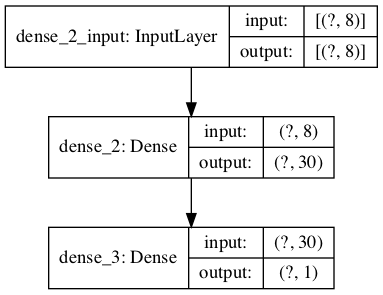

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

model.summary()

plot_model(model, show_shapes=True)

## 4-3. 모델 컴파일

In [8]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-3))

## 4-4. 모델 평가

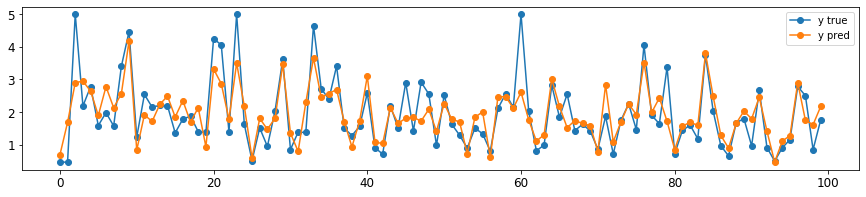

In [11]:
x_sample, y_sample = x_test[:100], y_test[:100]
y_pred = model.predict(x_sample)

plot_prediction(y_sample, y_pred)

## 4-5. 모델 학습

Train on 12384 samples, validate on 3096 samples
Epoch 1/30
12384/12384 [==============================] - 0s 38us/sample - loss: 2.3390 - val_loss: 0.9385
Epoch 2/30
12384/12384 [==============================] - 0s 27us/sample - loss: 0.7703 - val_loss: 0.7273
Epoch 3/30
12384/12384 [==============================] - 0s 26us/sample - loss: 0.6809 - val_loss: 0.6855
Epoch 4/30
12384/12384 [==============================] - 0s 27us/sample - loss: 0.6445 - val_loss: 0.6491
Epoch 5/30
12384/12384 [==============================] - 0s 26us/sample - loss: 0.6151 - val_loss: 0.6250
Epoch 6/30
12384/12384 [==============================] - 0s 27us/sample - loss: 0.5928 - val_loss: 0.6050
Epoch 7/30
12384/12384 [==============================] - 0s 27us/sample - loss: 0.5746 - val_loss: 0.5895
Epoch 8/30
12384/12384 [==============================] - 0s 26us/sample - loss: 0.5599 - val_loss: 0.5765
Epoch 9/30
12384/12384 [==============================] - 0s 27us/sample - loss: 0.5476 - val_l

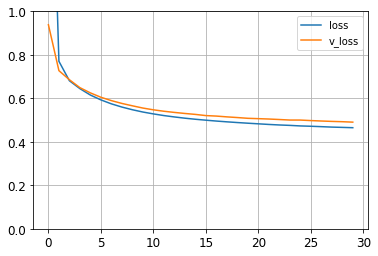

In [10]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)
plot_loss(history)

# 5. 캘리포니아 데이터셋 - 함수형 API

* 모든 신경망 모델이 단순하게 순서대로 나열되지는 않습니다. 어떤 신경망은 매우 복잡한 구조를 가집니다. 여러 개의 입력이 있거나 여러 개의 출력이 있습니다. 

## 5-1. 데이터 불러오기 
* **4**. 에서의 데이터와 같은 데이터를 사용합니다. 

In [8]:
print('x_train, y_train, x_test, y_test shape : ', x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print( x_train[0])

x_train, y_train, x_test, y_test shape :  (15480, 8) (15480,) (5160, 8) (5160,)
[ 0.17648852  0.66640687 -0.06085431 -0.2811182  -0.49654414 -0.04828325
 -0.8607415   0.73099911]


## 5-2. 모델 구성

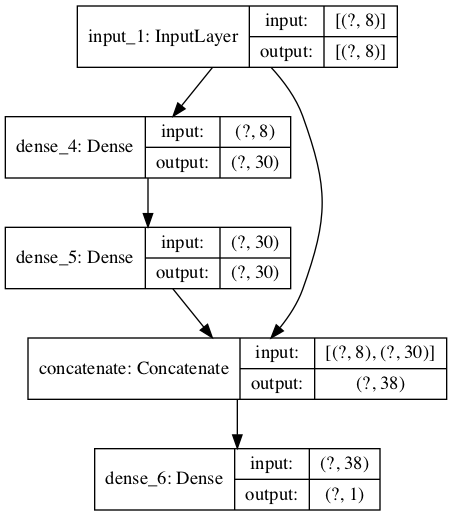

In [14]:
input_ = tf.keras.layers.Input(shape=x_train.shape[1:])
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.models.Model(inputs=[input_], outputs=[output])

plot_model(model, show_shapes=True)

## 5-3. 모델 컴파일

In [15]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-3))

## 5-4. 모델 평가

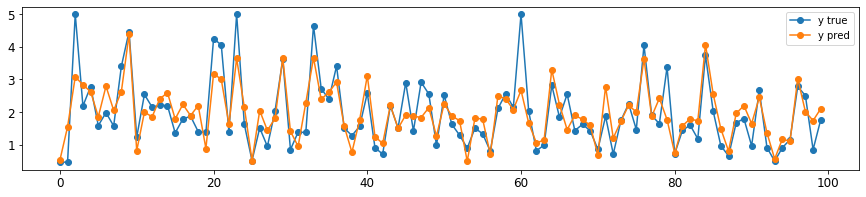

In [18]:
x_sample, y_sample = x_test[:100], y_test[:100]
y_pred = model.predict(x_sample)

plot_prediction(y_sample, y_pred)

In [20]:
model.evaluate(x_sample, y_sample)

100/100 [==============================] - 0s 43us/sample - loss: 0.3654


0.3653962540626526

## 5-5. 모델 학습

Train on 12384 samples, validate on 3096 samples
Epoch 1/30
12384/12384 [==============================] - 1s 42us/sample - loss: 1.9901 - val_loss: 0.8479
Epoch 2/30
12384/12384 [==============================] - 0s 29us/sample - loss: 0.7386 - val_loss: 0.7109
Epoch 3/30
12384/12384 [==============================] - 0s 29us/sample - loss: 0.6666 - val_loss: 0.6596
Epoch 4/30
12384/12384 [==============================] - 0s 28us/sample - loss: 0.6238 - val_loss: 0.6233
Epoch 5/30
12384/12384 [==============================] - 0s 28us/sample - loss: 0.5919 - val_loss: 0.5929
Epoch 6/30
12384/12384 [==============================] - 0s 28us/sample - loss: 0.5662 - val_loss: 0.5718
Epoch 7/30
12384/12384 [==============================] - 0s 28us/sample - loss: 0.5468 - val_loss: 0.5524
Epoch 8/30
12384/12384 [==============================] - ETA: 0s - loss: 0.531 - 0s 28us/sample - loss: 0.5296 - val_loss: 0.5391
Epoch 9/30
12384/12384 [==============================] - 0s 29us/sampl

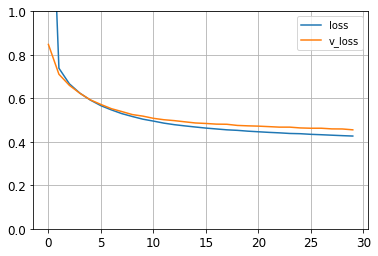

In [17]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)
plot_loss(history)

# 6. 캘리포니아 데이터셋 - 함수형 API 2

* 여러개의 입력 : 와이드나 딥 경로에 다른 입력 특성을 전달하면 어떻게 될까요? 
* (특성 0에서 4까지) 5개의 특성을 와이드 경로에 보내고 (특성 2에서 7까지) 6개의 특성을 딥 경로에 전달하겠습니다. 3개의 특성(특성 2, 3, 4)은 양쪽에 모두 전달됩니다.

## 6-1. 데이터 불러오기

In [21]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
print(x_train_A.shape, x_train_B.shape)

(15480, 5) (15480, 6)


## 6-2. 모델 구성

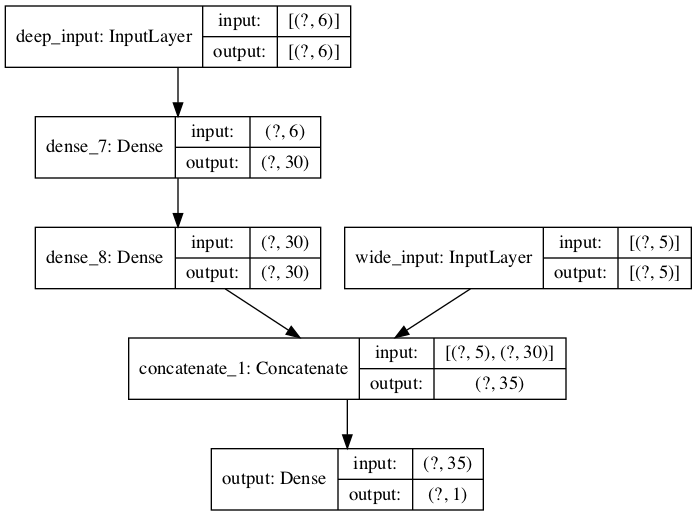

In [22]:
input_A = tf.keras.layers.Input(shape=[5], name="wide_input")
input_B = tf.keras.layers.Input(shape=[6], name="deep_input")
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output = tf.keras.layers.Dense(1, name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A, input_B], outputs=[output])
plot_model(model, show_shapes=True)

## 6-3. 모델 컴파일

In [23]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-3))

## 6-4. 모델 평가

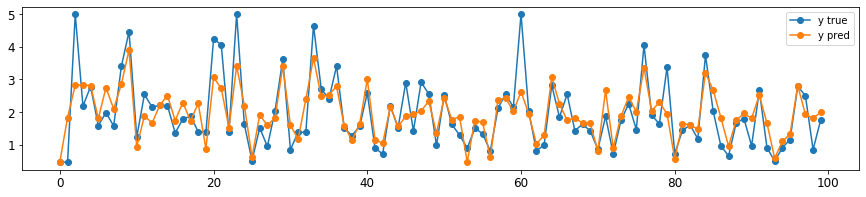

In [26]:
x_sample_A, x_sample_B, y_sample = x_test_A[:100], x_test_B[:100], y_test[:100]
y_pred = model.predict([x_sample_A, x_sample_B])

plot_prediction(y_sample, y_pred)

In [27]:
model.evaluate([x_sample_A, x_sample_B], y_sample)

100/100 [==============================] - 0s 41us/sample - loss: 0.3941


0.39410207033157346

## 6-5. 모델 학습

Train on 12384 samples, validate on 3096 samples
Epoch 1/30
12384/12384 [==============================] - 1s 43us/sample - loss: 2.4648 - val_loss: 0.9608
Epoch 2/30
12384/12384 [==============================] - 0s 30us/sample - loss: 0.7803 - val_loss: 0.7165
Epoch 3/30
12384/12384 [==============================] - 0s 30us/sample - loss: 0.6583 - val_loss: 0.6537
Epoch 4/30
12384/12384 [==============================] - 0s 30us/sample - loss: 0.6123 - val_loss: 0.6222
Epoch 5/30
12384/12384 [==============================] - 0s 30us/sample - loss: 0.5844 - val_loss: 0.5994
Epoch 6/30
12384/12384 [==============================] - 0s 30us/sample - loss: 0.5629 - val_loss: 0.5808
Epoch 7/30
12384/12384 [==============================] - 0s 30us/sample - loss: 0.5456 - val_loss: 0.5670
Epoch 8/30
12384/12384 [==============================] - 0s 30us/sample - loss: 0.5318 - val_loss: 0.5535
Epoch 9/30
12384/12384 [==============================] - 0s 30us/sample - loss: 0.5198 - val_l

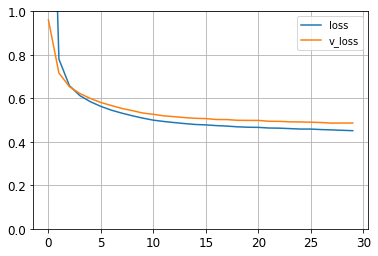

In [25]:
history = model.fit([x_train_A, x_train_B],y_train, epochs=30, validation_split=0.2)
plot_loss(history)

# 7. 캘리포니아 데이터셋 - 함수형 API 3 (p.387)

* 여러개의 입력과 여러개의 출력 모델
* 아래 그림과 똑같이 모델을 구성해 봅시다.

![model](complexmodel.png)

In [28]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
print(x_train_A.shape, x_train_B.shape)

(15480, 5) (15480, 6)


# 7-2 모델 구성

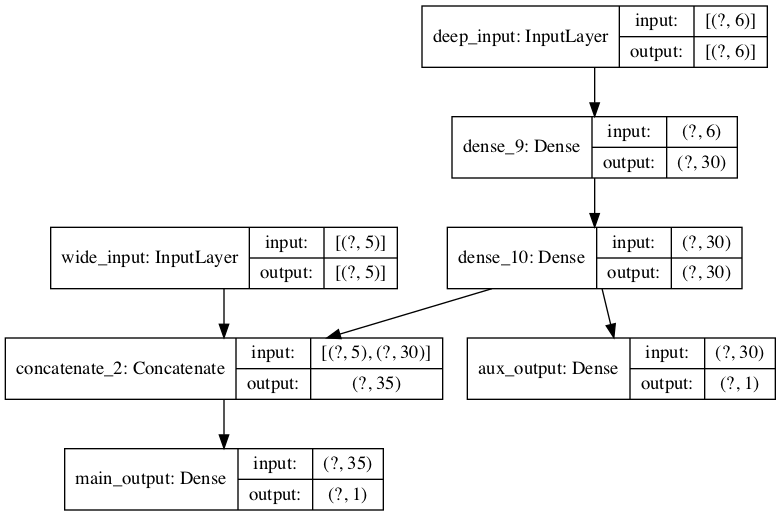

In [29]:
input_A = tf.keras.layers.Input(shape=[5], name="wide_input")
input_B = tf.keras.layers.Input(shape=[6], name="deep_input")
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden2)
main_output = tf.keras.layers.Dense(1, name="main_output")(concat)
model = tf.keras.models.Model(inputs=[input_A, input_B], outputs=[aux_output, main_output])
plot_model(model, show_shapes=True)


## 7-3. 모델 컴파일

In [30]:

model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-3))


## 7-4. 모델 평가

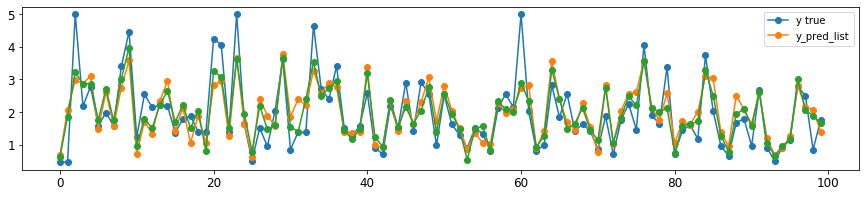

In [65]:

x_sample_A, x_sample_B, y_sample = x_test_A[:100], x_test_B[:100], y_test[:100]
y_pred1, y_pred2 = model.predict([x_sample_A, x_sample_B])

plot_prediction(y_sample, [y_pred1, y_pred2])

## 7-5. 모델 학습

Train on 12384 samples, validate on 3096 samples
Epoch 1/30
12384/12384 [==============================] - 0s 33us/sample - loss: 0.9696 - aux_output_loss: 0.5474 - main_output_loss: 0.4222 - val_loss: 1.0079 - val_aux_output_loss: 0.5589 - val_main_output_loss: 0.4491
Epoch 2/30
12384/12384 [==============================] - 0s 34us/sample - loss: 0.9625 - aux_output_loss: 0.5422 - main_output_loss: 0.4203 - val_loss: 0.9985 - val_aux_output_loss: 0.5524 - val_main_output_loss: 0.4462
Epoch 3/30
12384/12384 [==============================] - 0s 34us/sample - loss: 0.9529 - aux_output_loss: 0.5359 - main_output_loss: 0.4170 - val_loss: 0.9921 - val_aux_output_loss: 0.5478 - val_main_output_loss: 0.4444
Epoch 4/30
12384/12384 [==============================] - 0s 33us/sample - loss: 0.9452 - aux_output_loss: 0.5309 - main_output_loss: 0.4144 - val_loss: 0.9868 - val_aux_output_loss: 0.5438 - val_main_output_loss: 0.4432
Epoch 5/30
12384/12384 [==============================] - 0s 33us/s

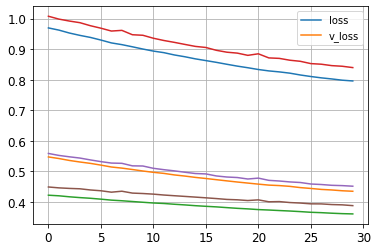

In [42]:
history = model.fit([x_train_A, x_train_B],[y_train, y_train], epochs=30, validation_split=0.2)


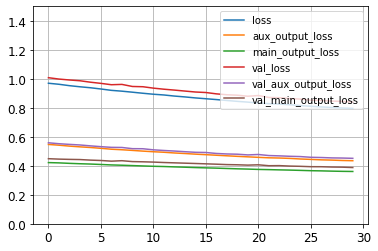

In [69]:
plot_loss(history)